<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/download)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

#### 1. Load Data

In [2]:
# Read Data
diabetes_csv = r'C:\Users\Vinitha\Desktop\IOD\DATA\diabetes.csv'
df = pd.read_csv(diabetes_csv)

#### 2. Perform EDA

Perform EDA. Check Null Values. Impute if necessary.

#### 3. Set Target

- Set `Outcome` as target.
- Set Features

In [3]:
# Set target and features
target = 'Outcome'
features = df.drop(target, axis=1).columns

print("\nTarget variable:", target)
print("Features:", list(features))


Target variable: Outcome
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y
- Find top 4 features
- Transform features to a DataFrame

In [7]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Create an instance of SelectKBest
# Univariate Selection
selector = SelectKBest(score_func=chi2, k=4)
X = df[features]
y = df[target]

In [ ]:
#Fit 
selector.fit(X, y)

In [10]:
# Print Score
scores = selector.scores_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to display feature names and their scores
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores})

In [11]:
scores_df

,Feature,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [12]:
# Transform X to Features
X_selector = selector.transform(X)

In [18]:
X_selector.shape

(768, 4)

In [19]:
X_selector

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In [20]:
#TOP 4 FEATURES
selector_feature_indices = selector.get_support(indices=True)
selector_features = X.columns[selector_feature_indices]

print("\nTop 4 features selected:")
print(selector_features)


Top 4 features selected:
Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


In [21]:
# Transform features to a dataframe
X_selector_df = pd.DataFrame(X_selector, columns = selector_features)

In [22]:
X_selector_df

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0
...,...,...,...,...
763,101.0,180.0,32.9,63.0
764,122.0,0.0,36.8,27.0
765,121.0,112.0,26.2,30.0
766,126.0,0.0,30.1,47.0


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [37]:
# ANSWER
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
rfe = RFE(estimator=model, n_features_to_select=3) 

In [41]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [43]:
# Print Score
selected_features_mask = rfe.support_

In [44]:
# Get the feature names of the selected features
selected_features = X.columns[selected_features_mask]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Pregnancies', 'BMI', 'DiabetesPedigreeFunction']


In [45]:
# Optional: View feature rankings
feature_ranking = rfe.ranking_
feature_ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking})

In [46]:
# Print feature ranking
print("\nFeature Ranking:")
print(feature_ranking_df.sort_values(by='Ranking'))
# Find Features


Feature Ranking:
                    Feature  Ranking
0               Pregnancies        1
5                       BMI        1
6  DiabetesPedigreeFunction        1
1                   Glucose        2
7                       Age        3
2             BloodPressure        4
4                   Insulin        5
3             SkinThickness        6


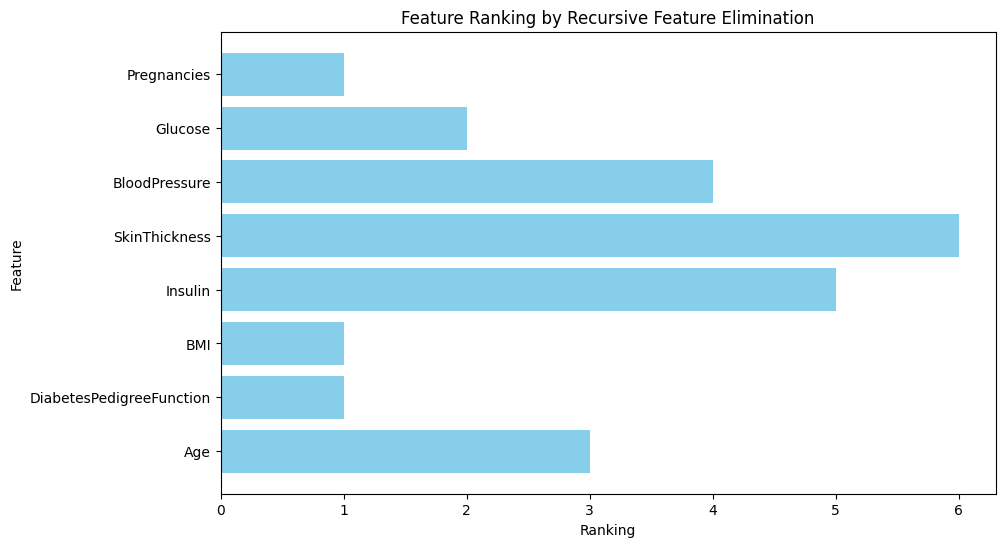

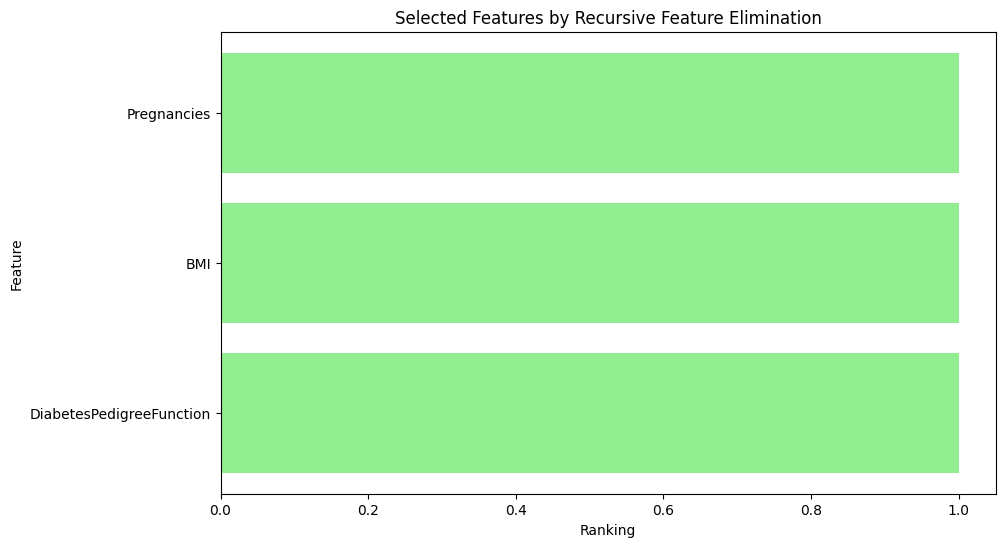

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking_df['Feature'], feature_ranking_df['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Feature Ranking by Recursive Feature Elimination')
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest rank at the top
plt.show()

# Plot selected features
plt.figure(figsize=(10, 6))
plt.barh(selected_features, np.array(feature_ranking)[selected_features_mask], color='lightgreen')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Selected Features by Recursive Feature Elimination')
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest rank at the top
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



